# CNN Model

Pilot model for classifying poison ivy images using a basic CNN architecture

## Config

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, Add, Input
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import os

os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['font.size'] = 12

In [2]:
# NOTEBOOK PARAMETERS
dest_path = '../datasets/pilot_final'
dest_metadata = '../datasets/pilot_final/dataset_metadata.csv'

train_path = '../datasets/pilot_final/train'
val_path = '../datasets/pilot_final/val'

image_size = (300,300)
batch_size = 20
epochs = 500



## Datasets

In [3]:
# Training data with augmentation
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

train_generator = train_datagen.flow_from_directory(train_path,
                                                    batch_size=batch_size,
                                                    class_mode='binary',
                                                    target_size=image_size)


# Validation data (just rescaled)
val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(val_path,
                                                batch_size=batch_size,
                                                class_mode='binary',
                                                target_size=image_size)

Found 124 images belonging to 2 classes.
Found 32 images belonging to 2 classes.


plt.imshow(next(train_generator)[0][0])
plt.axis('off')
plt.title("Sample image")
plt.show()

## Model and fitting

In [4]:
def make_tf_model():
    inputs = Input(shape=(image_size[0], image_size[1], 3))
    x = Conv2D(16, 3, padding='same', activation='relu')(inputs)
    x = MaxPool2D()(x)
    c0 = Conv2D(32, 1, padding='same', activation='relu')(x)
    x = Conv2D(32, 3, padding='same', activation='relu')(c0)
    x = Conv2D(32, 3, padding='same', activation='relu')(x)
    c1a = Add()([c0, x])
    x = MaxPool2D()(c1a)
    c1b = Conv2D(64, 1, padding='same', activation='relu')(x)
    x = Conv2D(64, 3, padding='same', activation='relu')(c1b)
    x = Conv2D(64, 3, padding='same', activation='relu')(x)
    x = Conv2D(64, 3, padding='same', activation='relu')(x)
    x = Add()([c1b, x])
    x = Flatten()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.2)(x)
    x = Dense(126, activation='relu')(x)
    x = Dropout(0.2)(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.2)(x)
    outputs = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return(model)

In [5]:
early_stopping = EarlyStopping(patience=50, restore_best_weights=False, monitor='val_accuracy')
reduce_lr = ReduceLROnPlateau(patience=5, factor=1./3, monitor='val_accuracy')
callbacks = [early_stopping, reduce_lr]

In [6]:
model = make_tf_model()
history = model.fit(train_generator,
                    epochs=epochs,
                    verbose=2,
                    validation_data=val_generator,
                    callbacks=callbacks)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 7 steps, validate for 2 steps
Epoch 1/500
7/7 - 4s - loss: 1.4588 - accuracy: 0.4839 - val_loss: 0.6958 - val_accuracy: 0.5000
Epoch 2/500
7/7 - 1s - loss: 0.7978 - accuracy: 0.4597 - val_loss: 0.7084 - val_accuracy: 0.5000
Epoch 3/500
7/7 - 1s - loss: 0.7194 - accuracy: 0.5081 - val_loss: 0.6894 - val_accuracy: 0.5000
Epoch 4/500
7/7 - 1s - loss: 0.6961 - accuracy: 0.4758 - val_loss: 0.6898 - val_accuracy: 0.5312
Epoch 5/500
7/7 - 1s - loss: 0.6955 - accuracy: 0.5161 - val_loss: 0.6806 - val_accuracy: 0.5938
Epoch 6/500
7/7 - 1s - loss: 0.7077 - accuracy: 0.5081 - val_loss: 0.6833 - val_accuracy: 0.5000
Epoch 7/500
7/7 - 1s - loss: 0.6794 - accuracy: 0.5161 - val_loss: 0.6821 - val_accuracy: 0.5312
Epoch 8/500
7/7 - 1s - loss: 0.6764 - accuracy: 0.6371 - val_loss: 0.6782 - val_accuracy: 0.4688
Epoch 9/500
7/7 - 1s - loss: 0.6830 - accuracy: 0.6694 - val_loss: 0.7133 - val_accuracy: 0.5000
Epoch 10/500
7/7 - 1s - loss: 0.6624 

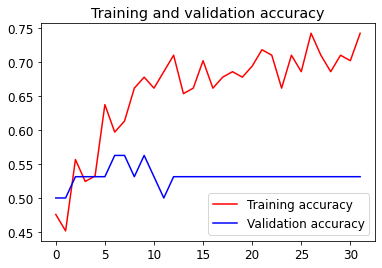

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()